In [80]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy import fftpack
from numpy import savetxt
from scipy.signal import lfilter, firwin

In [81]:
noise = 10
time_step = 0.05
period = 1.5

time_vec = np.arange(0, 10, time_step)
wave = 5*(10 * np.sin(2 * np.pi / period * time_vec)+20)
noisy_wave = wave + noise * np.random.randn(time_vec.size)

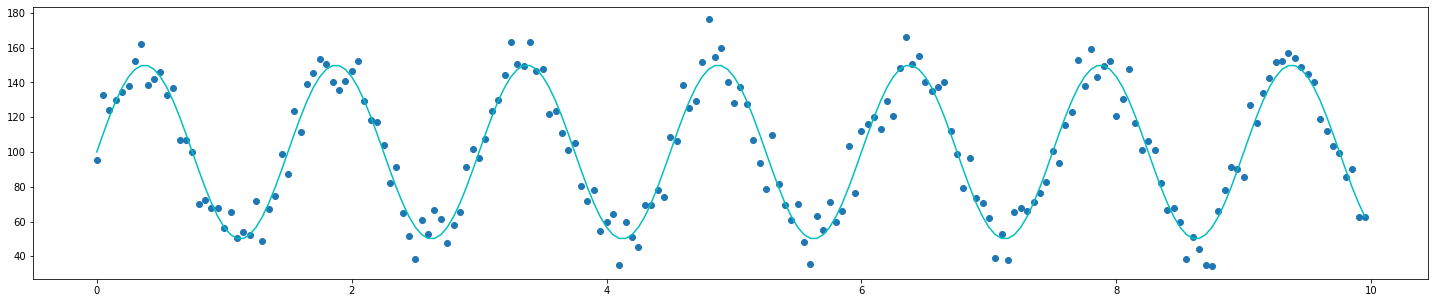

In [82]:
fpga_time = np.arange(np.size(fpga))
plt.figure(figsize=(25, 5))
plt.scatter(time_vec, noisy_wave)
plt.plot(time_vec, wave, 'c')
#plt.scatter(fpga_time, fpga/2)
plt.show()

In [83]:
fpga_sig = np.array([3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,224,224,224,0,3,6,11,13,0,240,240,240,0,3,6,3,5,16,240,240,240,0,0])
print(len(fpga_sig))
fpga_sig = fpga_sig/2
t = np.arange(len(fpga_sig))


163


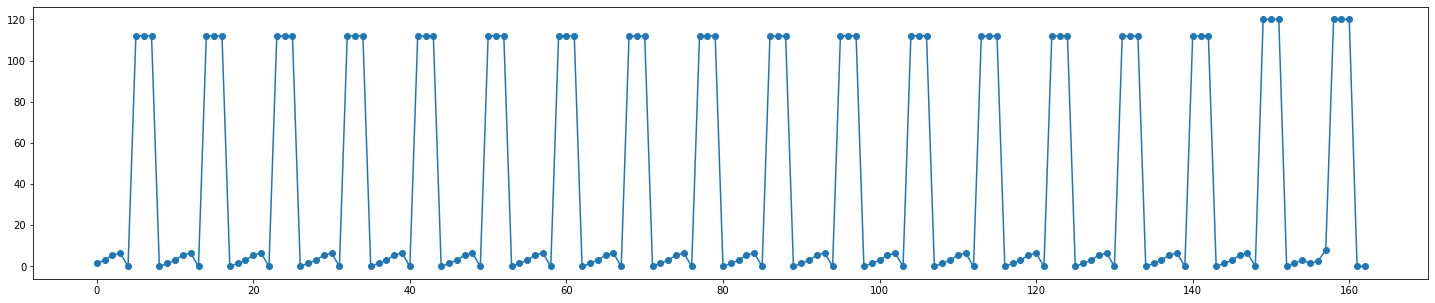

In [84]:
plt.figure(figsize=(25, 5))
plt.plot(t, fpga_sig, '-o')

Text(0, 0.5, 'power')

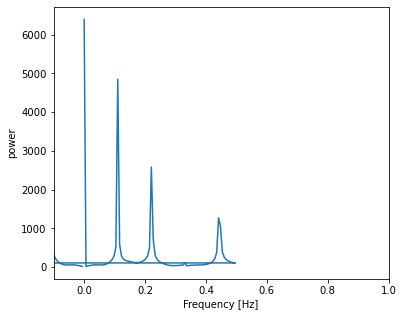

In [85]:
# The FFT of the signal
fpga_fft = fftpack.fft(fpga_sig)

# And the power (sig_fft is of complex dtype)
fpga_power = np.abs(fpga_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(fpga_sig.size, d=1)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.xlim(-.1,1)
plt.plot(sample_freq, fpga_power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')

ValueError: x and y must have same first dimension, but have shapes (163,) and (200,)

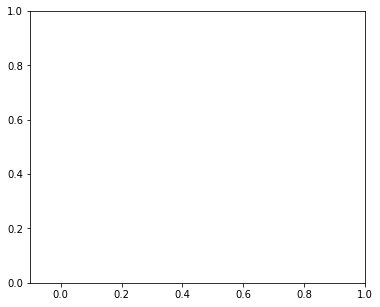

In [86]:
# The FFT of the signal
input_fft = fftpack.fft(input_sig)

# And the power (sig_fft is of complex dtype)
input_power = np.abs(input_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(fpga_sig.size, d=1)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.xlim(-.1,1)
plt.plot(sample_freq, input_power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')

## Getting the coefficients

In [92]:
numtaps = 4 #the higher it is, the more precise

In [99]:
f = 0.1

c = signal.firwin(numtaps, f)

noisy_wave = noisy_wave.astype(int)
t = np.arange(np.size(noisy_wave))

The trasformation law is:
$$Y[n]=C_0X[n]+C_1X[n-1]+C_2X[n-2]+C_3X[n-3]$$

In [100]:
python_sig = lfilter(c, 1.0, noisy_wave)

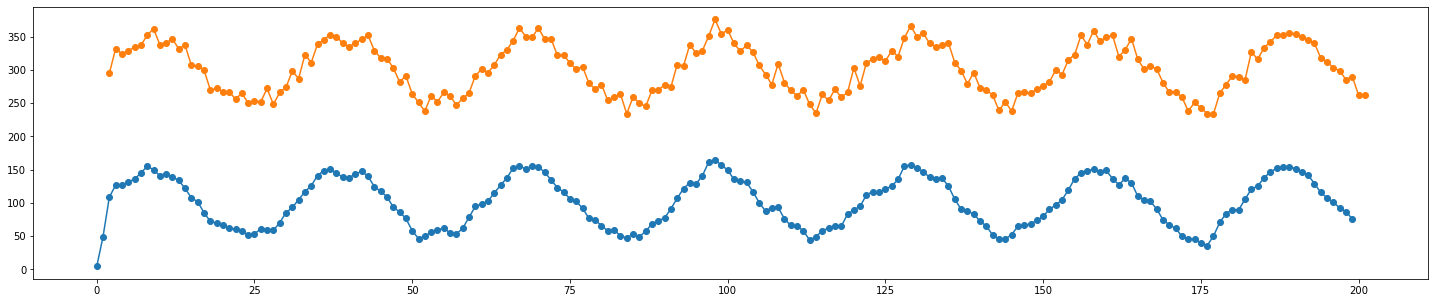

In [110]:
plt.figure(figsize=(25, 5))
plt.plot(t, python_sig, '-o')
plt.plot(t+2, noisy_wave+200, '-o')